In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('cleaned.csv')

In [3]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,0,67.00,1,91.00,0,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,0,79.33,0,78.33,0,2,77.48,2,1,86.5,2,66.28,1,200000.0
2,0,65.00,0,68.00,1,3,64.00,3,0,75.0,2,57.80,1,250000.0
3,0,56.00,0,52.00,1,2,52.00,2,0,66.0,1,59.43,0,265000.0
4,0,85.80,0,73.60,1,1,73.30,3,0,96.8,2,55.50,1,425000.0


In [4]:
df.shape

(215, 14)

In [5]:
X = df.drop(['status'], axis = 1)
y = df['status']


In [6]:
# lets print the shapes of these newly formed data sets
print("Shape of the x :", X.shape)
print("Shape of the y :", y.shape)

Shape of the x : (215, 13)
Shape of the y : (215,)


In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X =  sc.fit_transform(X)


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [10]:
# lets print the shapes again 
print("Shape of the X Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the X test :", X_test.shape)
print("Shape of the y test :", y_test.shape)

Shape of the X Train : (172, 13)
Shape of the y Train : (172,)
Shape of the X test : (43, 13)
Shape of the y test : (43,)


In [11]:
from tpot import TPOTClassifier

E:\Users\azmina.vanzara\AppData\Roaming\Python\Python38\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [12]:
tpot = TPOTClassifier(verbosity=2, max_time_mins=2)
tpot.fit(X_train, y_train)

Version 0.11.5 of tpot is outdated. Version 0.11.6 was released Monday October 26, 2020.



2.00 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: RandomForestClassifier(GradientBoostingClassifier(input_matrix, learning_rate=0.5, max_depth=6, max_features=0.6500000000000001, min_samples_leaf=1, min_samples_split=19, n_estimators=100, subsample=0.7500000000000001), bootstrap=True, criterion=gini, max_features=0.5, min_samples_leaf=4, min_samples_split=19, n_estimators=100)


TPOTClassifier(log_file=<ipykernel.iostream.OutStream object at 0x00000225EA6190D0>,
               max_time_mins=2, verbosity=2)

In [13]:
print(tpot.score(X_test, y_test))
print(tpot.score(X_test, y_test))

0.9767441860465116
0.9767441860465116


In [14]:

y_pred = tpot.predict(X_test)

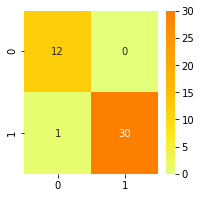

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.97      0.98        31

    accuracy                           0.98        43
   macro avg       0.96      0.98      0.97        43
weighted avg       0.98      0.98      0.98        43



In [17]:
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred)
print(cr)


In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
lr.fit(X_train,y_train)


LogisticRegression()

In [19]:
y_pred = lr.predict(X_test)


In [20]:
print("Training Accuracy :", lr.score(X_train, y_train))
print("Testing Accuracy :", lr.score(X_test, y_test))

Training Accuracy : 0.9127906976744186
Testing Accuracy : 0.8604651162790697


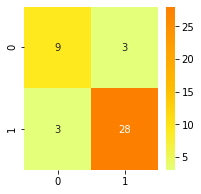

In [21]:
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.show()

In [22]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.90      0.90      0.90        31

    accuracy                           0.86        43
   macro avg       0.83      0.83      0.83        43
weighted avg       0.86      0.86      0.86        43

